<a href="https://colab.research.google.com/github/mavivi95/Notebooks/blob/main/Copia_de_Practicas_codigos_python_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Practicas codigos Python y Machine Learning

Para comenzar cargar las librerias de Python necesarias en las técnicas de Machine Learning. Las librerias y clases importadas en el orden del código del bloque siguiente son:
 

* **csv**: para importar datos en formato csv
*   **Numpy**: para el trabajo con datos matriciales
*   **sklearn.model_selection**, función **train_test_split** para segmentar de manera adecuada el conjunto de datos en entrenamineto y prueba
*  **sklearn.preprocessing**, función **SrandadScaler** para estandarizar los datos y evitar problemas con unidades desbalanceadas
* **sklearn.linear_model**, función **Perceptron** para establer la clase del perceptron. Esta clase tienes los metodos para entrenarlo y analizar su rendimiento
* **matplotlib.plot** libreria empleada para realizar gráficas en python



In [ ]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'cyan', 'lightgreen', 'gray', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

###Calidad del Vino Rojo

Los datos corresponden a 1599 muestras del producto "Vino Verde Tinto" que incluyen 11 características fisicoquímicas del producto y una columna de etiquetas donde se calificó por un experto la calidad del vino en una escala de (0-10) puntos, siendo 10 la mejor calidad.

* Acidez fija
* Acidez volátil 
* Acido cítrico
* Azúcar residual
* Cloruros
* Dióxido de azufre libre 
* Dióxido de azufre total
* Densidad
* pH
* Alcohol

In [ ]:
from numpy import genfromtxt
data_with_header = genfromtxt('/content/drive/MyDrive/Dataset/winequality-red.csv', delimiter=';')
data = data_with_header[1::,:]

x = data[:,0:-1]
y = []
for label in data[:,-1]:  y.append(int(label)) 
#data
print('Numero de clases - Calidad vino rojo:', np.unique(y))


Numero de clases - Calidad vino rojo: [3 4 5 6 7 8]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print('Datos en y_train:', np.bincount(y))
print('Datos en y_train:', np.bincount(y_train))
print('Datos en y_test:', np.bincount(y_test))

Datos en y_train: [  0   0   0  10  53 681 638 199  18]
Datos en y_train: [  0   0   0   7  37 477 446 139  13]
Datos en y_test: [  0   0   0   3  16 204 192  60   5]


Como se puede apreciar, las clases estan desbalanceadas inicialmente no hay calificaciones de 0 a 2 en calificaciones de la calidad, hay muy pocos datos calificados en 3 y muy pocos para 8. Por esa razon se creará un nuevo vector de etiquetas, los valores menores o iguales a 6 crearan una clase y los valores mayores la otra.

In [ ]:
y_binary = []
for label in data[:,-1]:  
  if label >= 6: y_binary.append(0)
  else: y_binary.append(1)
print('Numero de clases - Calidad vino rojo:', np.unique(y_binary))

Numero de clases - Calidad vino rojo: [0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.3, random_state=1, stratify=y_binary)
print('Datos totales por etiqueta:', np.bincount(y_binary))
print('Datos en y_train:', np.bincount(y_train))
print('Datos en y_test:', np.bincount(y_test))

Datos totales por etiqueta: [855 744]
Datos en y_train: [598 521]
Datos en y_test: [257 223]


El objeto StandarScaler permite estandarizar los datos. Primero se construye el objeto, con el método *fit* se calcula la media y la desviación estandar del conjunto de datos, con el método *transform* realiza la centralización y estandarización de los datos. Si se desea tambien esta disponible el método *fit_transform* el cual primero ejecuta la rutina *fit* seguida por la rutina *transform*

Documentación de la clase:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [ ]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.fit_transform(X_test)
print(X_train_std)

[[ 4.26040881  0.69402716  1.13621356 ... -2.64121515  0.54063364
   0.64288463]
 [-0.60667593 -0.17731226 -0.90207707 ... -0.04913265 -1.15430921
   0.07787101]
 [-0.13755933  0.83456577  1.44979674 ... -0.93589771 -0.21267429
  -0.95798731]
 ...
 [ 0.33155728 -0.2335277   1.34526901 ... -0.66304693 -0.40100128
   1.58457401]
 [-1.1344321   1.53725885 -1.42471569 ...  1.2469086  -0.8404309
   1.11372932]
 [ 1.03523218 -1.35783663  0.97942198 ... -1.82266278  0.85451195
  -0.20463581]]


Con los datos centralizados y estandarizados se realiza la llamada a la libreria **sklearn** en la clase **linear_model** y la función **Perceptron**, esta función crea una estructrua de clasificador a partir de los datos de prueba, el número de iteraciones y la razon de aprendizaje. 

Documentación de la libreria: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Con el clasificador creado se procede a realizar una prueba con los datos separados previamente. 

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Datos mal clasificados: %d' % (y_test != y_pred).sum())
print('Precisión: %.2f' % ppn.score(X_test_std, y_test))

Datos mal clasificados: 199
Precisión: 0.59


Como se puede observar la precision del clasificador empleado es del baja, esto al realizar la primera prueba con los datos de Test. 

A continuación, se realizará el mismo procedimiento pero primero se ejecutará la transformación a dos componentes principales, para eso se emplea de la misma libreria la clase **decomposition** en el metodo *PCA*


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(x)
X_pca = pca.transform(x)

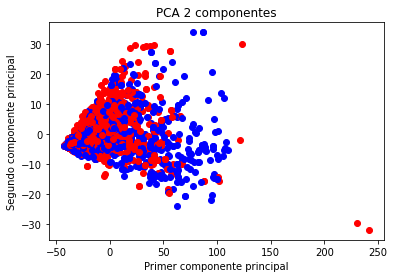

In [ ]:
import matplotlib.pyplot as plt
colors = ('red', 'blue')
k = 0
for point in X_pca:
  plt.scatter(point[0],point[1], c=colors[y_binary[k]])
  k +=1
#plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA 2 componentes')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_binary, test_size=0.3, random_state=1, stratify=y_binary)
print('Datos totales:', np.bincount(y_binary))
print('Datos en y_train:', np.bincount(y_train))
print('Datos en y_test:', np.bincount(y_test))

Datos totales: [855 744]
Datos en y_train: [598 521]
Datos en y_test: [257 223]


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.fit_transform(X_test)
ppn_pca = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn_pca.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = ppn_pca.predict(X_test_std)
print('Datos mal clasificados: %d' % (y_test != y_pred).sum())
print('Precisión: %.2f' % ppn_pca.score(X_test_std, y_test))

Datos mal clasificados: 194
Precisión: 0.60


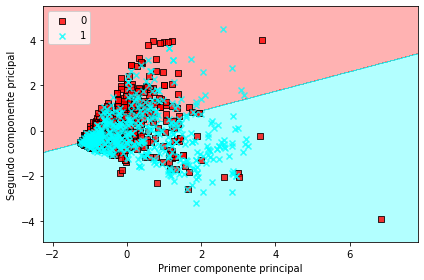

In [ ]:
plot_decision_regions(X=X_train_std, y=y_train,
                      classifier=ppn_pca)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente pricipal')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Datos espectográfia óptica de fluorescencia para detección de CCU
Los datos corresponden a 152 mujeres patológicas y no patológicas, los vectores por individuo tienen una longitud de 36 características que corresponden al análisis de la señal de espectroscopia. Esta señal se compone de 5 formas gaussianas y cada forma presenta características que se asocian con la presencia de cáncer de cuello uterino.  Para el ejercicio se cuenta con datos etiquetados por un experto, en las categorías de patológico o no.

In [ ]:
import scipy.io as sio
data = sio.loadmat('/content/drive/MyDrive/Dataset/dataCancer.mat')
data = data['X']
x = data[:,0:-1]
y = []
for label in data[:,-1]:  y.append(int(label)) 
print('Numero de clases - Datos CCU:', np.unique(y))
print(data)

Numero de clases - Datos CCU: [1 2]
[[6.6468858e-01 3.4000124e+02 2.9976724e+01 ... 5.4214194e+00
  2.8136896e+02 1.0000000e+00]
 [7.3254198e-01 3.4000000e+02 2.6691678e+01 ... 4.8233393e+00
  2.7706597e+02 1.0000000e+00]
 [7.6307098e-01 3.5126473e+02 3.9999704e+01 ... 4.4388355e+00
  2.4182813e+02 1.0000000e+00]
 ...
 [5.7104038e-01 3.5523214e+02 3.4921031e+01 ... 4.3763408e-01
  5.3171930e+01 2.0000000e+00]
 [5.4217837e-01 3.6801723e+02 3.9869415e+01 ... 4.3057096e-01
  5.9919552e+01 2.0000000e+00]
 [4.7348589e-01 3.6114126e+02 2.3020306e+01 ... 3.2452778e-01
  4.7762056e+01 2.0000000e+00]]


Para estos datos se hará primero la extracción de las componentes principales, pero es necesario previamente estandarizar los datos. 

In [ ]:
sc = StandardScaler()
sc.fit(x)
x_std = sc.transform(x)

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(x_std)
X_pca = pca.transform(x_std)

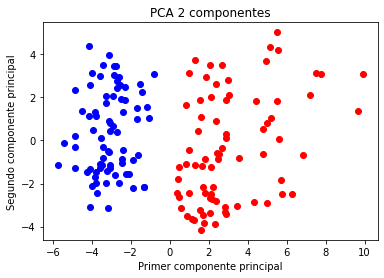

In [ ]:
k = 0
colors = ('red', 'blue')
for point in X_pca:
  plt.scatter(point[0],point[1], c=colors[y[k]-1])
  k +=1
#plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA 2 componentes')
plt.show()

Ahora se establecen la division de datos entre entrenamiento y prueba. 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1, stratify=y)
print('Datos totales:', np.bincount(y))
print('Datos en y_train:', np.bincount(y_train))
print('Datos en y_test:', np.bincount(y_test))

Datos totales: [ 0 76 76]
Datos en y_train: [ 0 53 53]
Datos en y_test: [ 0 23 23]


In [ ]:
ppn_ccu = Perceptron(max_iter=10, eta0=0.2, random_state=1)
ppn_ccu.fit(X_train, y_train, verbose=2)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.2,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('W1: %.3f;' % ppn_ccu.coef_[0][0], ' W2: %.3f' % ppn_ccu.coef_[0][1])
print('Intercepto: %.3f' % ppn_ccu.intercept_)

W1: -1.160;  W2: -0.111
Intercepto: -0.200


In [ ]:
y_pred = ppn_ccu.predict(X_test)
print('Datos mal clasificados: %d' % (y_test != y_pred).sum())
print('Precisión: %.2f' % ppn_ccu.score(X_test, y_test))

Datos mal clasificados: 0
Precisión: 1.00


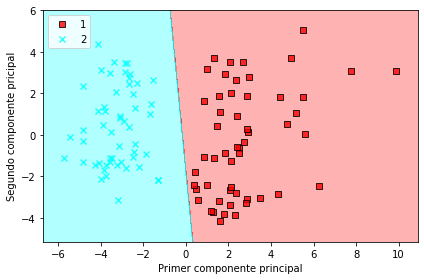

In [ ]:
plot_decision_regions(X=X_train, y=y_train,
                      classifier=ppn_ccu)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente pricipal')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Clasificadores No lineales

En esta sección se realizará la construcción de un clasificador no lineal, en este caso se probará con un perceptron multicapa de la libreria Sklearn. El conjuntos de datos para esta fase corresponde a una aplicación de clasificación de vidrios, se cuenta con X datos divididos en 2 clases: vidrios para la contrucción de ventanas procesados y no procesados. El vector de caracteristicas se compone de 9 atributos numericos :

* RI: Indice de refracción
* Na: Sodio presente en el vidrio, unidad de medida porcentaje de peso presente en oxido
* Mg: Magnesio
* Al: Aluminio
* Si: Silicon
* K: Potasio
* Ca: Calcio
* Ba: Bario
* Fe: Hierro

Base de datos: https://archive.ics.uci.edu/ml/datasets/glass+identification

In [ ]:
import scipy.io as sio
data = sio.loadmat('/content/drive/MyDrive/Dataset/data_glass.mat')
data = data['data']
x = data[0:146,0:-1]
y = []
for label in data[0:146,-1]:  y.append(int(label)) 
print('Numero de clases - Datos Clasificación de vidrio:', np.unique(y))


Numero de clases - Datos Clasificación de vidrio: [1 2]


El anterior bloque de codigo importa los datos y presenta el número de etiquetas presentes.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print('Datos en y_train:', np.bincount(y_binary))
print('Datos en y_train:', np.bincount(y_train))
print('Datos en y_test:', np.bincount(y_test))

Datos en y_train: [855 744]
Datos en y_train: [ 0 49 53]
Datos en y_test: [ 0 21 23]


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Se construye un clasificador perceptron multicapa con una capa oculta y de 5 neuronas, se indica un maximo de iteraciones en 500.

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1, max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)
print('Datos mal clasificados: %d' % (y_test != y_pred).sum())
print('Precisión: %.2f' % clf.score(X_test, y_test))

Datos mal clasificados: 11
Precisión: 0.75


La primera validación se realiza al variar el número de capas ocultas del perceptron, se toman capas desde 1 hasta 7 y en todas se les ubican 9 unidades neuronales.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


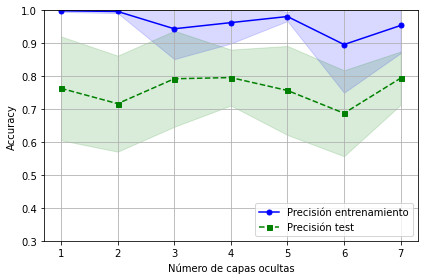

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [(9,)*1, (9,)*2, (9,)*3, (9,)*4, (9,)*5, (9,)*6, (9,)*7]
param_range_1d = [1, 2, 3, 4, 5, 6, 7]
train_scores, test_scores = validation_curve(
                estimator=clf, 
                X=X_train, 
                y=y_train, 
                param_name='hidden_layer_sizes', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range_1d , train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Precisión entrenamiento')

plt.fill_between(param_range_1d , train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range_1d , test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Precisión test')

plt.fill_between(param_range_1d , 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Número de capas ocultas')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
plt.show()

Ahora se realizará el mismo procedimiento pero variando el número de neuronas en la capa oculta, se tomara fijo 2 capas y se varia entre 2 y 40 neuronas en cada capa.

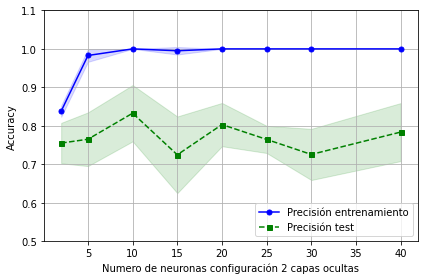

In [ ]:
param_range = [(2,)*2, (5,)*2, (10,)*2, (15,)*2, (20,)*2, (25,)*2, (30,)*2, (40,)*2]
param_range_1d = [2, 5, 10, 15, 20, 25, 30, 40]
train_scores, test_scores = validation_curve(
                estimator=clf, 
                X=X_train, 
                y=y_train, 
                param_name='hidden_layer_sizes', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range_1d , train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Precisión entrenamiento')

plt.fill_between(param_range_1d , train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range_1d , test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Precisión test')

plt.fill_between(param_range_1d , 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Numero de neuronas configuración 2 capas ocultas')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.tight_layout()
plt.show()

Para probar el comportamiento del clasificador cuando se varia el número de neuronas en las capas ocultas y el número de capas, se realiza el siguiente ciclo en el cual se estan variando ambos hiperparametros.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<Figure size 1800x288 with 0 Axes>

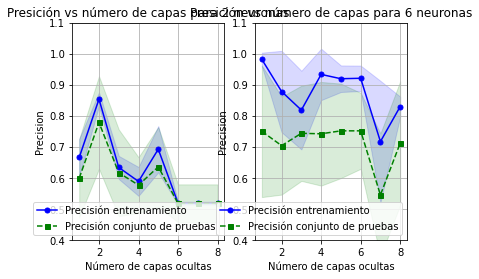

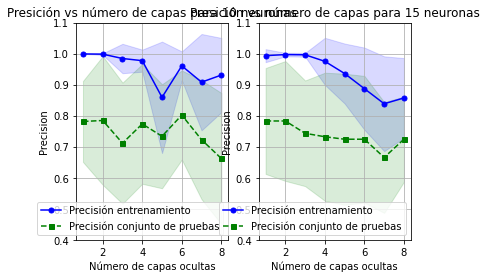

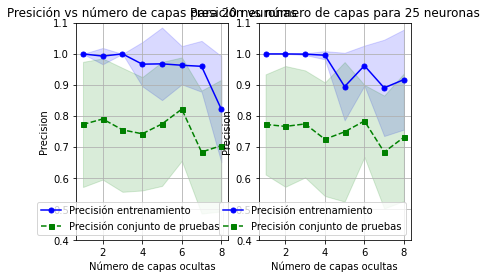

In [ ]:

neuron_vector = [2, 6, 10, 15, 20, 25]
k = 0 
plt.figure(figsize=(25,4)) 
for neuron_unit  in neuron_vector:
  if k == 0: 
    fig, axs = plt.subplots(1, 2) 
    
  param_range = [(neuron_unit,)*1, (neuron_unit,)*2, (neuron_unit,)*3, (neuron_unit,)*4, (neuron_unit,)*5, (neuron_unit,)*6, (neuron_unit,)*7, (neuron_unit,)*8]
  param_range_1d = [1, 2, 3, 4, 5, 6, 7, 8]
  train_scores, test_scores = validation_curve(
                  estimator=clf, 
                  X=X_train, 
                  y=y_train, 
                  param_name='hidden_layer_sizes', 
                  param_range=param_range,
                  cv=15)

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  axs[k].plot(param_range_1d , train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Precisión entrenamiento')

  axs[k].fill_between(param_range_1d , train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  axs[k].plot(param_range_1d , test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Precisión conjunto de pruebas')

  axs[k].fill_between(param_range_1d , 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')
  
  axs[k].grid()
  axs[k].legend(loc='lower right')
  axs[k].set_title('Presición vs número de capas para %d neuronas' % neuron_unit)
  axs[k].set_xlabel('Número de capas ocultas')
  axs[k].set_ylabel('Precision')
  axs[k].set_ylim([0.4, 1.1])
  k += 1
  if k>= 2: k= 0
  #axs[k].set_tight_layout()
  #axs[k].show()

# Perceptron Multicapa (Capítulo 12)

En esta sección se construye el perceptron multicapa estudiado en el capítulo 12, la construcción del perceptron se realiza en la clase *NeuralNetMLP* 

In [ ]:
import numpy as np
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatche_size : int (default: 1)
        Number of training samples per minibatch.
    seed : int (default: None)
        Random seed for initalizing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_samples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_samples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_samples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_samples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_samples]
            Target class labels.
        X_valid : array, shape = [n_samples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_samples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_samples, n_classlabels]
                sigma_out = a_out - y_train_enc[batch_idx]

                # [n_samples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_samples, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_samples] dot [n_samples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)

                # [n_hidden, n_samples] dot [n_samples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

### Calidad del Vino Rojo


In [ ]:
from numpy import genfromtxt
data_with_header = genfromtxt('/content/drive/MyDrive/Dataset/winequality-red.csv', delimiter=';')
data = data_with_header[1::,:]
x = data[:,0:-1]
y = []
for label in data[:,-1]:  y.append(int(label)) 

y_binary = []
for label in data[:,-1]:  
  if label >= 6: y_binary.append(0)
  else: y_binary.append(1)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y_binary, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y_binary)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_train = np.array(X_train_std)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#Parámetros Perceptron
neuronas_ocultas = 15;
epocas = 150;
constante_aprendizaje = 0.00001;

Perceptron_vino = NeuralNetMLP(n_hidden=neuronas_ocultas, 
                  epochs=epocas, 
                  eta=constante_aprendizaje,
                  shuffle=True,
                  seed=1)

In [ ]:
Perceptron_vino.fit(X_train=X_train, 
                    y_train=y_train,
                    X_valid=X_test,
                    y_valid=y_test)

150/150 | Cost: 1545.25 | Train/Valid Acc.: 53.44%/53.54% 

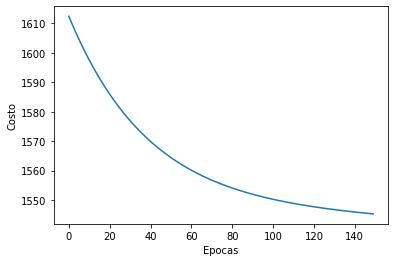

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(Perceptron_vino.epochs), Perceptron_vino.eval_['cost'])
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.show()

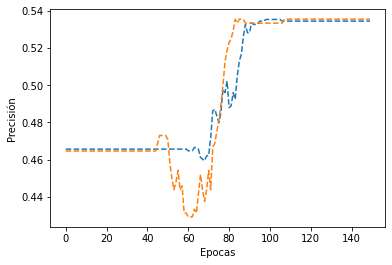

In [ ]:
plt.plot(range(Perceptron_vino.epochs), Perceptron_vino.eval_['train_acc'], '--')
plt.plot(range(Perceptron_vino.epochs), Perceptron_vino.eval_['valid_acc'], '--')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.show()

## Clasificación de vidrios

In [ ]:
import scipy.io as sio
data = sio.loadmat('/content/drive/MyDrive/Dataset/data_glass.mat')
data = data['data']
x = data[0:146,0:-1]
y = []
for label in data[0:146,-1]:  
  if int(label) == 2:
    y.append(0) 
  else:
    y.append(1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#Parámetros Perceptron
neuronas_ocultas = 25;
epocas = 100;
constante_aprendizaje = 0.001;

Perceptron_vidrios = NeuralNetMLP(n_hidden=neuronas_ocultas, 
                                  epochs=epocas, 
                                  l2=0.01,
                                  eta=constante_aprendizaje,
                                  shuffle=True,
                                  seed=1)

In [ ]:
Perceptron_vidrios.fit(X_train=X_train, 
                        y_train=y_train,
                        X_valid=X_test,
                        y_valid=y_test)

100/100 | Cost: 154.60 | Train/Valid Acc.: 62.93%/66.67% 

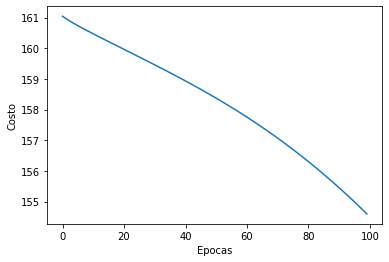

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(Perceptron_vidrios.epochs), Perceptron_vidrios.eval_['cost'])
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.show()

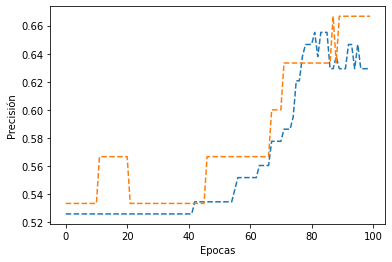

In [ ]:
plt.plot(range(Perceptron_vidrios.epochs), Perceptron_vidrios.eval_['train_acc'], '--')
plt.plot(range(Perceptron_vidrios.epochs), Perceptron_vidrios.eval_['valid_acc'], '--')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.show()

## Parametro de regularización

In [ ]:
from numpy import genfromtxt
data_with_header = genfromtxt('/content/drive/MyDrive/Dataset/winequality-red.csv', delimiter=';')
data = data_with_header[1::,:]
x = data[:,0:-1]
y = []
for label in data[:,-1]:  y.append(int(label)) 

y_binary = []
for label in data[:,-1]:  
  if label >= 6: y_binary.append(0)
  else: y_binary.append(1)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y_binary, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y_binary)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_train = np.array(X_train_std)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
neuronas_ocultas = 15;
epocas = 100;
constante_aprendizaje = 0.00001;
L2 = np.round(np.arange(1.5,2.5,0.1),2); #tercera
#L2= np.round(np.arange(0.0,4.5,0.5),2); #busqueda media
#L2= np.round(np.arange(0.0,10,1),2); #busqueda inicial 
acc_train = np.zeros(len(L2))
acc_test = np.zeros(len(L2))
cost = np.zeros(len(L2))
k = 0;
for i in L2:
  Perceptron_vino = NeuralNetMLP(n_hidden=neuronas_ocultas, 
                      l2=i,
                      epochs=epocas, 
                      eta=constante_aprendizaje,
                      shuffle=True,
                      seed=1)
  Perceptron_vino.fit(X_train=X_train, 
                      y_train=y_train,
                      X_valid=X_test,
                      y_valid=y_test)
  acc_train[k]=Perceptron_vino.eval_['train_acc'][-1]
  acc_test[k] =Perceptron_vino.eval_['valid_acc'][-1]
  cost[k] = Perceptron_vino.eval_['cost'][-1]
  k +=1

100/100 | Cost: 1547.50 | Train/Valid Acc.: 53.44%/53.54% 

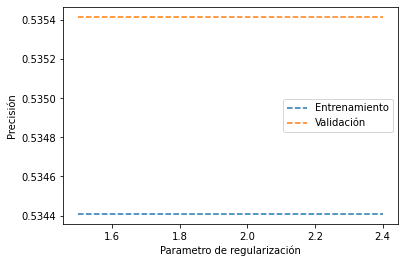

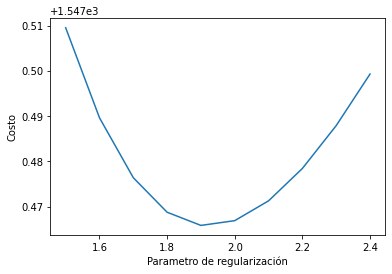

In [ ]:
plt.plot(L2, acc_train, '--', label='Entrenamiento')
plt.plot(L2, acc_test, '--', label = 'Validación')
plt.ylabel('Precisión')
plt.xlabel('Parametro de regularización')
plt.legend()
plt.show()

plt.plot(L2, cost, label = 'Costo')
plt.ylabel('Costo')
plt.xlabel('Parametro de regularización')
plt.show()

# Perceptron Multicapa (Capítulo 13)

En esta sección se construyen redes neuronales profundas con ayuda de la API Keras de TensorFlow conceptos estudiados en el capítulo 13. Comenzamos importando las librerias de TensorFlow, 

In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import keras as keras
np.random.seed(123)
tf.set_random_seed(123)

El siguiente paso es cargar los datos, si los datos tiene categorias o etiquetas numeradas (1,2..) o (clase1, clase2, ..) es necesario llevar estas categorias a la representación one-hot, sistema en el cual la salida de la red neuronal sera un vector de $s$ posiciones donde $s$ es el número de clases. Las etiquetas tendran la forma de vectores con entradas cero en todas las posiciones menos en la posición $i$ que representa la clase a la cual pertenece. 

Por ejemplo para un sistema de tres clases identificadas con $(1,2,3)$, los vectores asociados en representación one_hot serán:

$$(1,2,3)= [1 \ 0 \ 0]^T; [0 \ 1 \ 0]^T; [0 \ 0 \ 1]^T $$


In [ ]:
from numpy import genfromtxt
data_with_header = genfromtxt('/content/drive/MyDrive/Dataset/winequality-red.csv', delimiter=';')
data = data_with_header[1::,:]
x = data[:,0:-1]
y = []
for label in data[:,-1]:  y.append(int(label)) 

y_one_hot = keras.utils.to_categorical(y)

y_binary = []
for label in data[:,-1]:  
  if label >= 6: y_binary.append(0)
  else: y_binary.append(1)

print(y_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y_binary, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y_binary)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_train = np.array(X_train_std)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape[1])

11


Coonstrucción del modelo en Keras

In [ ]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units=22,    
        input_dim=X_train.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=44,    
        input_dim=22,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=22,    
        input_dim=44,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=22,    
        input_dim=22,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))
model.add(
    keras.layers.Dense(
        units=22,    
        input_dim=22,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=1,    
        input_dim=22,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid'))


sgd_optimizer = keras.optimizers.SGD(
        lr=0.001, decay=1e-7, momentum=.9)

#model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy') 
#model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy')
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy')

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=5, epochs=10,
                    verbose=1, 
                    validation_split=0.4)

Train on 671 samples, validate on 448 samples
Epoch 1/10
671/671 [==============================] - 0s 334us/sample - loss: 0.0423 - val_loss: 0.8135
Epoch 2/10
671/671 [==============================] - 0s 343us/sample - loss: 0.0374 - val_loss: 0.8600
Epoch 3/10
671/671 [==============================] - 0s 364us/sample - loss: 0.0458 - val_loss: 0.8524
Epoch 4/10
671/671 [==============================] - 0s 354us/sample - loss: 0.0423 - val_loss: 0.8343
Epoch 5/10
671/671 [==============================] - 0s 351us/sample - loss: 0.0883 - val_loss: 0.8864
Epoch 6/10
671/671 [==============================] - 0s 356us/sample - loss: 0.0358 - val_loss: 0.8832
Epoch 7/10
671/671 [==============================] - 0s 362us/sample - loss: 0.0425 - val_loss: 0.8712
Epoch 8/10
671/671 [==============================] - 0s 350us/sample - loss: 0.0466 - val_loss: 0.8906
Epoch 9/10
671/671 [==============================] - 0s 364us/sample - loss: 0.0358 - val_loss: 0.8795
Epoch 10/10
671/67

In [ ]:
y_train_pred = model.predict_classes(X_train, verbose=0)
y_train_pred_array = np.zeros(len(y_train_pred))
k=0
for x in y_train_pred:
  #print(x)
  y_train_pred_array[k] = x[0]
  k+=1
#print(y_train_pred_array)
correct_preds = np.sum(y_train == y_train_pred_array, axis=0) 
train_acc = correct_preds / y_train.shape[0]


print('Training accuracy: %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(X_test, verbose=0)
y_test_pred_array = np.zeros(len(y_test_pred))
k=0
for x in y_test_pred:
  y_test_pred_array[k] = x[0]
  k+=1
correct_preds = np.sum(y_test == y_test_pred_array, axis=0) 
test_acc = correct_preds / y_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))


Training accuracy: 92.67%
Test accuracy: 60.00%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
